# 世界銀行オープンデータの取得



## pandas_datareader

Pythonのモジュール`pandas_datareader`があり，これは経済指標などを中心にオープンデータをWeb上からPandasのDataFrame形式に読み込んでくれるものです。

このライブラリはGoogle Colaboratoryでは標準でインストール済みですので，インポートするだけで使うことができます。`pandas_datareader`に含まれる`wb`モジュールをインポートします。


In [25]:
import pandas as pd
from pandas_datareader import wb

## G7各国の1人あたりのGDPを取得

https://data.worldbank.org/indicator/NY.GDP.PCAP.CD?view=chart

1960年以降の世界各国の1人あたりのGDPデータが取得できます。ここではG7各国のデータを取得してグラフ表示します。

```
pdr.wb.download(
  indicator = '取得対象の指標コード',
  country = ['国コードリスト'],
  start = 取得開始年,
  end = 取得終了年,
)
```

In [14]:
df = wb.download(indicator='NY.GDP.PCAP.CD', country=['CAN', 'DEU', 'FRA', 'ITA', 'JPN', 'USA', 'GBR'], start=1990, end=2023)
df

<ipython-input-14-ea0db0b88327>:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator='NY.GDP.PCAP.CD', country=['CAN', 'DEU', 'FRA', 'ITA', 'JPN', 'USA', 'GBR'], start=1990, end=2023)


NY.GDP.PCAP.CD
country       year                
Canada        2023    53371.697432
              2022    55509.393176
              2021    52496.844169
              2020    43537.839299
              2019    46352.869345
...                            ...
United States 1994    27694.853416
              1993    26387.293734
              1992    25418.990776
              1991    24342.258905
              1990    23888.600009

[238 rows x 1 columns]

世界銀行のデータは表示されているように各国のデータをすべて1列で返えしてきます。これをunstackメソッドを使ってindexの先頭情報（国名）のみで列に分解します。

また変換後の各列は階層化しており，最上位の列である"indicator"の下に各国のデータ列が入っています。従って，droplevelメソッドを使って最上位列を削除します。

In [15]:
df2 = df.unstack(level=0)
df2.columns = df2.columns.droplevel()
df2.head(4)

country,Canada,France,Germany,Italy,Japan,United Kingdom,United States
year,,,,,,,
1990,21525.861139,21865.555254,22303.961327,20825.784223,25801.395039,19095.466998,23888.600009
1991,21846.793047,21675.706088,23357.757725,21956.529771,29428.428904,19900.726651,24342.258905
1992,20950.330529,23814.227368,26438.230389,23243.474528,31992.790212,20487.170785,25418.990776
1993,20186.798878,22380.331905,25522.629573,18738.763897,36345.244126,18389.019568,26387.293734


matplotlibを使ってグラフ表示してみます。Colaboratoryのデフォルト環境ではmatplotlibは日本語フォントが使えません（いわゆる豆腐化）。日本語表示するためのライブラリ`japanaize-matplotlib`をpipでインストールします。

In [16]:
!pip install japanize-matplotlib

ライブラリをインポートします。

In [17]:
import matplotlib.pyplot as plt
import japanize_matplotlib # 日本語化

各国のデータを折れ線グラフで描画します。

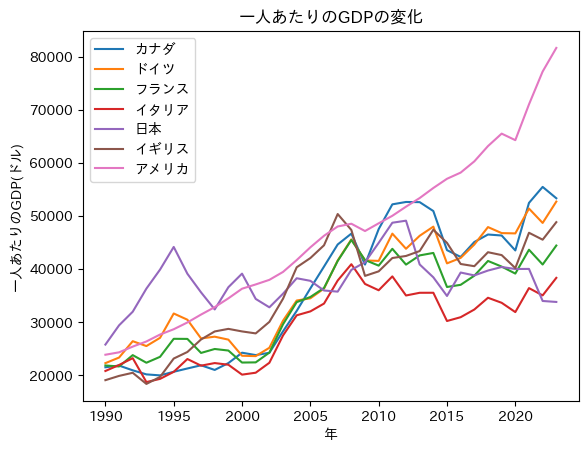

In [18]:
plt.plot(df2.index, df2['Canada'], label='カナダ')
plt.plot(df2.index, df2['Germany'], label='ドイツ')
plt.plot(df2.index, df2['France'], label='フランス')
plt.plot(df2.index, df2['Italy'], label='イタリア')
plt.plot(df2.index, df2['Japan'], label='日本')
plt.plot(df2.index, df2['United Kingdom'], label='イギリス')
plt.plot(df2.index, df2['United States'], label='アメリカ')
plt.xticks(list(map(str,range(1990, 2024, 5))))
plt.xlabel('年')
plt.ylabel('一人あたりのGDP(ドル)')
plt.title('一人あたりのGDPの変化')
plt.legend()
plt.show()

## 電力消費量（一人当たりkWh）

https://data.worldbank.org/indicator/EG.USE.ELEC.KH.PC?view=chart

これは2014年までのデータしか公開されていないので，。

In [19]:
df = wb.download(indicator='EG.USE.ELEC.KH.PC', country=['CAN', 'DEU', 'FRA', 'ITA', 'JPN', 'USA', 'GBR'], start=1990, end=2015)
df3 = df.unstack(level=0)
df3.columns = df3.columns.droplevel()
df3.head(4)

<ipython-input-19-edebb8ce6504>:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator='EG.USE.ELEC.KH.PC', country=['CAN', 'DEU', 'FRA', 'ITA', 'JPN', 'USA', 'GBR'], start=1990, end=2015)


country,Canada,France,Germany,Italy,Japan,United Kingdom,United States
year,,,,,,,
1990,16167.374559,5988.660360,6639.731691,4144.907442,6808.791850,5356.575210,11713.331704
1991,16181.588748,6359.962606,6564.797195,4224.740106,7006.598690,5451.677171,12134.172132
1992,16164.419040,6475.928108,6445.874000,4310.537968,7023.532248,5452.393333,12014.958248
1993,16320.127298,6453.066166,6288.416350,4303.645312,7077.361831,5491.989118,12261.523782


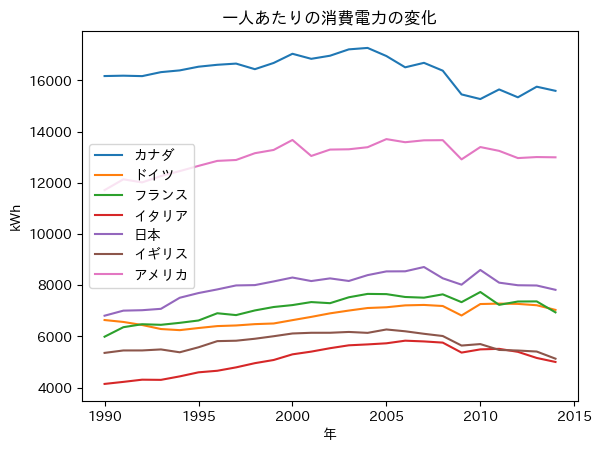

In [20]:
plt.plot(df3.index, df3['Canada'], label='カナダ')
plt.plot(df3.index, df3['Germany'], label='ドイツ')
plt.plot(df3.index, df3['France'], label='フランス')
plt.plot(df3.index, df3['Italy'], label='イタリア')
plt.plot(df3.index, df3['Japan'], label='日本')
plt.plot(df3.index, df3['United Kingdom'], label='イギリス')
plt.plot(df3.index, df3['United States'], label='アメリカ')
plt.xticks(list(map(str,range(1990, 2016, 5))))
plt.xlabel('年')
plt.ylabel('kWh')
plt.title('一人あたりの消費電力の変化')
plt.legend()
plt.show()

## ※パラメータ
### 主な指標（indicator）

世界銀行オープンデータに登録されているデータ一覧は以下のURLを参照してください。

https://data.worldbank.org/indicator

指標コードは，各指標のURLの`https://data.worldbank.org/indicator/`の後にくる4つのドット区切りのコードになります。


#### 経済指標
| 指標名 | 指標コード |
| --- | --- |
| GDP（米ドル） | NY.GDP.MKTP.CD |
| 一人当たりGDP（米ドル） | NY.GDP.PCAP.CD |
| 国際経常収支（米ドル） | BN.CAB.XOKA.CD |
| 中央政府債務総額（GDP比） | GC.DOD.TOTL.GD.ZS |

#### エネルギー
|  |  |
| --- | --- |
| エネルギー使用量（一人当たり石油換算kg | EG.USE.PCAP.KG.OE |
| 電力消費量（一人当たりkWh） | EG.USE.ELEC.KH.PC |
| 再生可能電力出力（総電力出力を100とした割合） | EG.ELC.RNEW.ZS |

### 国コード
データを取得するための国コードは，国際標準規格ISO 3166-1の3桁コードを使用します。

- [ISO 3166-1（Wikipedia）](https://ja.wikipedia.org/wiki/ISO_3166-1)

Pythonで扱いやすいようにOECD加盟国（準加盟・非加盟だが経済力のある国含む）の国コードをリスト化したものを用意します。


In [21]:
OECD = {
    ('AUS', 'Australia', 'オーストラリア'),
    ('AUT', 'Austria', 'オーストリア'),
    ('BEL', 'Belgium', 'ベルギー'),
    ('CAN', 'Canada', 'カナダ'),
    ('CHL', 'Chile', 'チリ'),
    ('CZE', 'Czechia', 'チェコ'),
    ('DNK', 'Denmark', 'デンマーク'),
    ('EST', 'Estonia', 'エストニア'),
    ('FIN', 'Finland', 'フィンランド'),
    ('FRA', 'France', 'フランス'),
    ('DEU', 'Germany', 'ドイツ'),
    ('GRC', 'Greece', 'ギリシャ'),
    ('HUN', 'Hungary', 'ハンガリー'),
    ('ISL', 'Iceland', 'アイスランド'),
    ('IRL', 'Ireland', 'アイルランド'),
    ('ISR', 'Israel', 'イスラエル'),
    ('ITA', 'Italy', 'イタリア'),
    ('JPN', 'Japan', '日本'),
    ('KOR', 'Korea, Rep.', '韓国'),
    ('LUX', 'Luxembourg', 'ルクセンブルク'),
    ('MEX', 'Mexico', 'メキシコ'),
    ('NLD', 'Netherlands', 'オランダ'),
    ('NZL', 'New Zealand', 'ニュージーランド'),
    ('NOR', 'Norway', 'ノルウェー'),
    ('POL', 'Poland', 'ポーランド'),
    ('PRT', 'Portugal', 'ポルトガル'),
    ('SVK', 'Slovak Republic', 'スロバキア'),
    ('SVN', 'Slovenia', 'スロベニア'),
    ('ESP', 'Spain', 'スペイン'),
    ('SWE', 'Sweden', 'スゥエーデン'),
    ('CHE', 'Switzerland', 'スイス'),
    ('TUR', 'Turkiye', 'トルコ'),
    ('GBR', 'United Kingdom', 'イギリス'),
    ('USA', 'United States', 'アメリカ'),
# 以下，OECD非加盟だが経済力がOECD加盟国に匹敵する国々
    ('ARG', 'Argentina', 'アルゼンチン'),
    ('BRA', 'Brazil', 'ブラジル'),
    ('CHN', 'China', '中国'),
    ('IND', 'India', 'インド'),
    ('IDN', 'Indonesia', 'インドネシア'),
    ('RUS', 'Russian Federation', 'ロシア'),
    ('SAU', 'Saudi Arabia', 'サウジアラビア'),
    ('ZAF', 'South Africa', '南アフリカ'),
}


## 散布図
世界銀行のオープンデータから一人あたりのGDPと教育に対する政府支出総額を国別で比較するための散布図を作図してみます。


「一人あたりのGDP」のOECD各国のデータを取得します。

In [22]:
df = wb.download(indicator='NY.GDP.PCAP.CD', country=list(map(lambda x: x[0], OECD)), start=2000, end=2023)

df2 = df.unstack(level=0)
df2.columns = df2.columns.droplevel()
df2.tail(4)

<ipython-input-22-733d4045016b>:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator='NY.GDP.PCAP.CD', country=list(map(lambda x: x[0], OECD)), start=2000, end=2023)


country,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,China,Czechia,Denmark,...,Saudi Arabia,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkiye,United Kingdom,United States
year,,,,,,,,,,,,,,,,,,,,,
2020,8500.837939,51868.247557,48789.497850,45587.968308,6923.699912,43537.839299,13162.591352,10408.719554,22992.879383,60836.592412,...,20398.061433,19553.260961,25558.429054,5753.066494,26984.296277,52837.903978,85897.784334,8638.739133,40217.009012,64317.398913
2021,10650.860460,60697.245436,53517.890451,51863.831157,7794.880979,52496.844169,16185.914771,12617.505104,26822.514186,69268.651798,...,24315.615327,21765.722502,29331.064701,7073.612754,30488.820953,61417.680877,93446.434452,9743.213131,46869.759058,71055.876194
2022,13650.604629,65077.676669,52084.681195,49942.090642,9065.497334,55509.393176,15411.173954,12662.583169,27226.615639,67790.053992,...,30447.882317,21279.458925,28439.334099,6766.481254,29674.544286,56299.505733,93259.905718,10674.504173,45564.156945,77246.673883
2023,13730.514709,64711.765603,56505.968280,53475.293495,10043.623922,53371.697432,17093.241971,12614.060995,30427.423469,67967.381869,...,28894.963352,24470.238538,32163.511415,6253.161613,32676.983711,56305.250201,99994.938020,12985.753150,48866.603960,81695.187071


次に「教育に対する政府支出総額（GDP比）」のデータを取得します。

https://data.worldbank.org/indicator/SE.XPD.TOTL.GD.ZS?view=chart


In [23]:
df = wb.download(indicator='SE.XPD.TOTL.GD.ZS', country=list(map(lambda x: x[0], OECD)), start=2000, end=2023)

df3 = df.unstack(level=0)
df3.columns = df3.columns.droplevel()
df3.tail(4)

<ipython-input-23-f6273073aa38>:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = wb.download(indicator='SE.XPD.TOTL.GD.ZS', country=list(map(lambda x: x[0], OECD)), start=2000, end=2023)


country,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,China,Czechia,Denmark,...,Saudi Arabia,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkiye,United Kingdom,United States
year,,,,,,,,,,,,,,,,,,,,,
2020,5.27690,5.378280,5.571270,6.80186,5.77150,4.887950,5.62993,4.233381,4.72159,7.383540,...,NaN,4.76428,5.38374,6.17067,4.895400,7.92561,5.276760,4.033820,5.439350,5.39998
2021,4.64117,5.333210,5.494110,6.35552,5.49698,4.748600,4.99924,3.988325,4.80320,6.999930,...,NaN,4.79718,5.36526,6.54903,4.865070,7.57220,5.037090,3.537880,5.904580,5.42830
2022,4.80521,5.206777,4.774471,NaN,NaN,4.139572,NaN,4.023570,NaN,5.296434,...,NaN,NaN,NaN,6.16726,4.315879,NaN,4.888245,2.614304,4.959176,NaN
2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.11467,NaN,NaN,6.14839,NaN,NaN,NaN,NaN,NaN,NaN


「一人あたりのGDP」と「教育に対する政府支出総額（GDP比）」をカラム（列）に，各国をインデックス（行）にしたDataFrame形式に変換します。欠損値が一番少なく，新しい統計値として2020年


In [51]:

df4 = pd.concat([df3.loc['2020', :], df2.loc['2020', :]], axis=1, join='inner')
#df4.columns = ['GDP', 'Current education expenditure, total']
df4.columns = ['Current education expenditure, total', 'GDP']
df4

,"Current education expenditure, total",GDP
country,,
Argentina,5.276900,8500.837939
Australia,5.378280,51868.247557
Austria,5.571270,48789.497850
Belgium,6.801860,45587.968308
Brazil,5.771500,6923.699912
Canada,4.887950,43537.839299
Chile,5.629930,13162.591352
China,4.233381,10408.719554
Czechia,4.721590,22992.879383


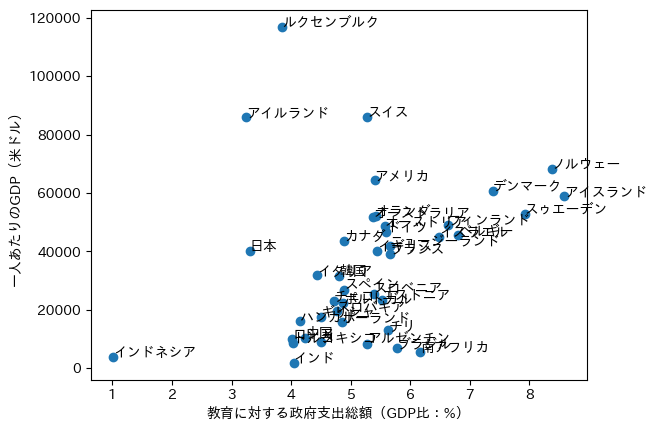

In [54]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter( df4['Current education expenditure, total'], df4['GDP'] )
ax.set_xlabel('教育に対する政府支出総額（GDP比：%）')
ax.set_ylabel('一人あたりのGDP（米ドル）')
for key, value in df4.iterrows():
    ax.annotate(next(country[2] for country in OECD if country[1] == key), value)